In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
import math

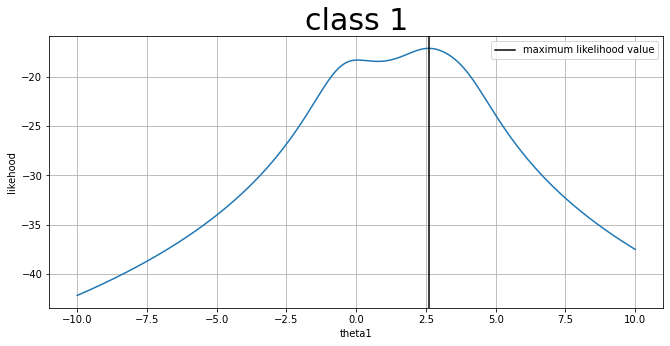

20000
parameter value:  2.599999999993017


In [2]:
#calculate probability function for the first class
x1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
log_likelihood1 = lambda theta : sum(math.log(((1/math.pi)*(1/(1 +(x-theta)**2)))) for x in x1)

thetas1 = np.arange(-10, 10, 0.001)
estimates1 = [log_likelihood1(theta) for theta in thetas1]

#calculate probability function for the second class
x2 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
log_likelihood2 = lambda theta : sum(((1/math.pi)*(1/(1 +(x-theta)**2))) for x in x2)

thetas2 = np.arange(-10, 10, 0.01)
estimates2 = [log_likelihood2(theta) for theta in thetas2]

#plot
plt.plot(thetas1, estimates1)
plt.axvline(x = thetas1[estimates1.index(max(estimates1))], color = 'black', label = 'maximum likelihood value')
plt.grid()
plt.title('class 1', fontsize=30)
plt.xlabel('theta1')
plt.ylabel('likehood')
plt.legend()
plt.show()

print(len(estimates1))
print('parameter value: ', thetas1[estimates1.index(max(estimates1))])